#### Source article from The Economist that we're recreating

https://www.economist.com/graphic-detail/2024/02/16/american-consumers-are-finally-cheering-up

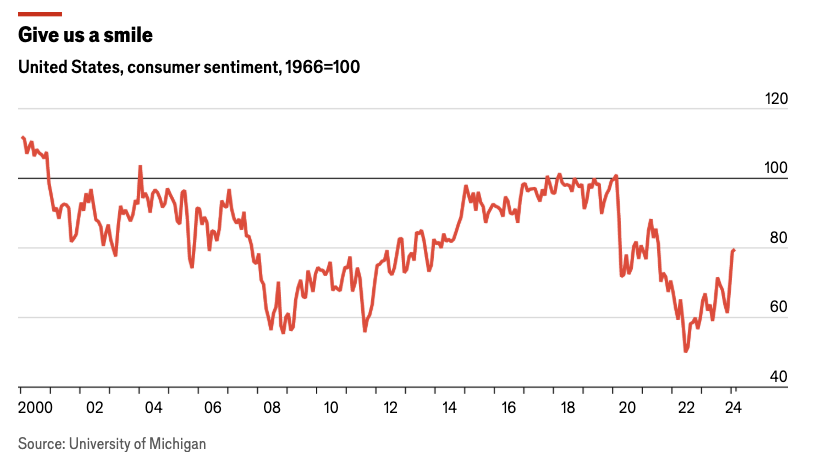

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib import patches

In [50]:
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23ebf3fb&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1320&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UMCSENT&scale=left&cosd=1952-11-01&coed=2025-01-01&line_color=%230073e6&link_values=false&line_style=solid&mark_type=none&mw=3&lw=3&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2025-03-09&revision_date=2025-03-09&nd=1952-11-01')

In [51]:
df.head()

,observation_date,UMCSENT
0,1952-11-01,86.2
1,1952-12-01,NaN
2,1953-01-01,NaN
3,1953-02-01,90.7
4,1953-03-01,NaN


In [52]:
df.columns = ['observation_date', 'value']

In [91]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['value'] = pd.to_numeric(df['value'])

df = df[df['observation_date'].between('2000-01-01', '2024-01-01')]

In [54]:
settings = {
    'title': 'Give us a smile',
    'subtitle': 'United States, consumer sentiment, 1966=100',
    'source': 'Source: University of Michigan',
    'red_color': '#F6423C',
    'figsize': (13, 5),
    'linewidth': 3,
    'grid': {
        'linewidth': 1.7,
        'alpha': 0.2
    },
    'font_sizes': {
        'title': 20,
        'subtitle': 18,
        'source': 14,
        'ticks': 14
    }
}

(10945.0, 20088.0)

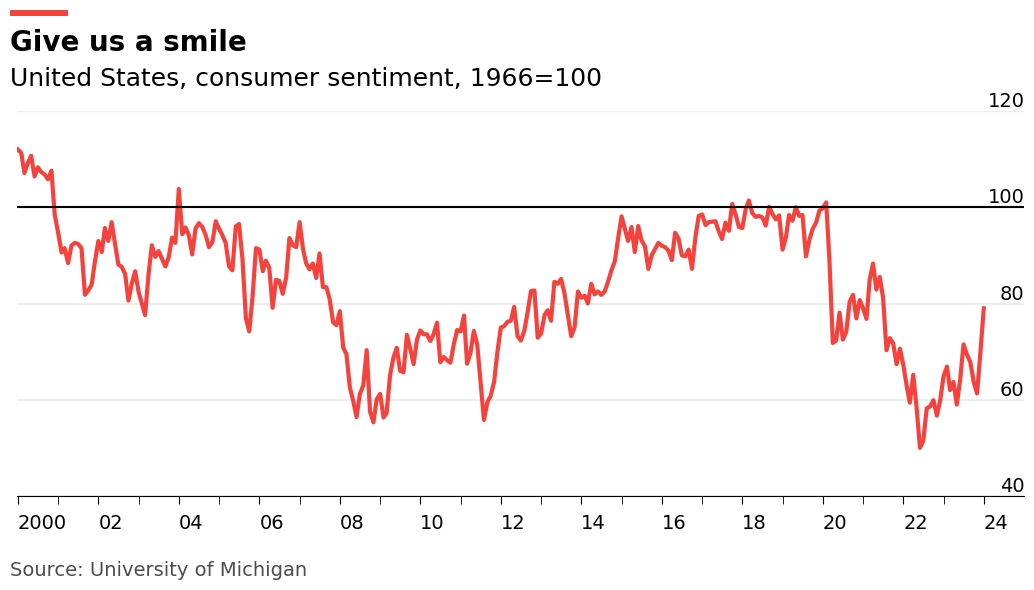

In [92]:
fig, ax = plt.subplots(figsize=settings['figsize'])
ax.plot(df['observation_date'], df['value'], color=settings['red_color'], linewidth=settings['linewidth'])

ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('none')

ax.yaxis.grid(True, linewidth=settings['grid']['linewidth'], alpha=settings['grid']['alpha'])

ax.set_ylim(40, 120)
yticks = [40, 60, 80, 100, 120]
ax.set_yticks(yticks)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axhline(y=100, color="black")

ax.set_yticklabels(
    [str(i) for i in yticks],
    ha='right',
    va='bottom'
)
ax.tick_params(axis='y', pad=-3, labelsize=settings['font_sizes']['ticks'])
ax.tick_params(axis='x', labelsize=settings['font_sizes']['ticks'], length=6, pad=7)
ax.tick_params(axis='x', which='minor', length=6)

def year_formatter(x, pos):
  date = mdates.num2date(x)
  year = date.year

  return '2000'if year == 2000 else f'{str(year)[2:]}'

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(year_formatter))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

for label in ax.get_xticklabels():
  pos = label.get_position()
  label.set_ha('left')
  label.set_position((pos[0] + 0.1, pos[1]))

fig.text(0.12, 1, settings['title'], fontsize=settings['font_sizes']['title'], fontweight=900)
fig.text(0.12, 0.93, settings['subtitle'], fontsize=settings['font_sizes']['subtitle'], fontweight=300)
fig.text(0.12, -0.05, settings['source'], fontsize=settings['font_sizes']['source'], alpha=0.7)

rect = patches.Rectangle(
    (0.12, 1.07),
    width=0.045,
    height=0.012,
    facecolor=settings['red_color'],
    transform=fig.transFigure,
    clip_on=False
)
ax.add_artist(rect)

start_date = pd.to_datetime('1999-12-20')
end_date = pd.to_datetime('2024-12-31')
ax.set_xlim(start_date, end_date)